# Data visualisation

In [1]:
#packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import surprise as sp
import sklearn as sk
from project_helpers import *

In [2]:
#check the version we use in our project 
print('Pandas version:',pd.__version__)
print('Numpy version:',np.__version__)
print('Surprise version:',sp.__version__)
print('Sklearn version:',sk.__version__)

Pandas version: 0.24.2
Numpy version: 1.16.2
Surprise version: 1.1.0
Sklearn version: 0.20.3


In [3]:
#import dataset
train = pd.read_csv('data_train.csv')
train = df_to_surprise(train)
train.head()

,userID,itemID,rating
0,44,1,4
1,61,1,3
2,67,1,4
3,72,1,3
4,86,1,5


In [4]:
#data analysis of the traing set
print('Number of users: ', train.userID.unique().shape[0])
print('Number of movies: ', train.itemID.unique().shape[0])
print('Number of entries: ', train.shape[0])
print('Matrix sparsity: ', (1 - (train.shape[0]/(train.userID.unique().shape[0]*train.itemID.unique().shape[0])))*100, '%')
print('Ratings range: ', sorted(train.rating.unique()))

Number of users:  10000
Number of movies:  1000
Number of entries:  1176952
Matrix sparsity:  88.23048 %
Ratings range:  [1, 2, 3, 4, 5]


In [5]:
user_rating = train.groupby('userID').size()
print('Maximum number of movies rate by a user: ', user_rating.max())
print('Minimum number of movies rate by a user: ', user_rating.min())
print('Average number of movies rate by a user: ', user_rating.mean())
print('Median number of movies rate: ', user_rating.median())
print('Number of users who rate less than 10 movies: ', (user_rating < 10).sum())

Maximum number of movies rate by a user:  522
Minimum number of movies rate by a user:  3
Average number of movies rate by a user:  117.6952
Median number of movies rate:  104.0
Number of users who rate less than 10 movies:  10


In [6]:
movie_rating = train.groupby('itemID').size()
print('Maximum number of ratings received by a movie: ', movie_rating.max())
print('Minimum number of ratings received by a movie: ', movie_rating.min())
print('Average ratings received by a movie: ', movie_rating.mean())
print('Median ratings received: ', movie_rating.median())
print('Number of movies with less than 100 ratings: ', (movie_rating < 100).sum())

Maximum number of ratings received by a movie:  4590
Minimum number of ratings received by a movie:  8
Average ratings received by a movie:  1176.952
Median ratings received:  883.5
Number of movies with less than 100 ratings:  32


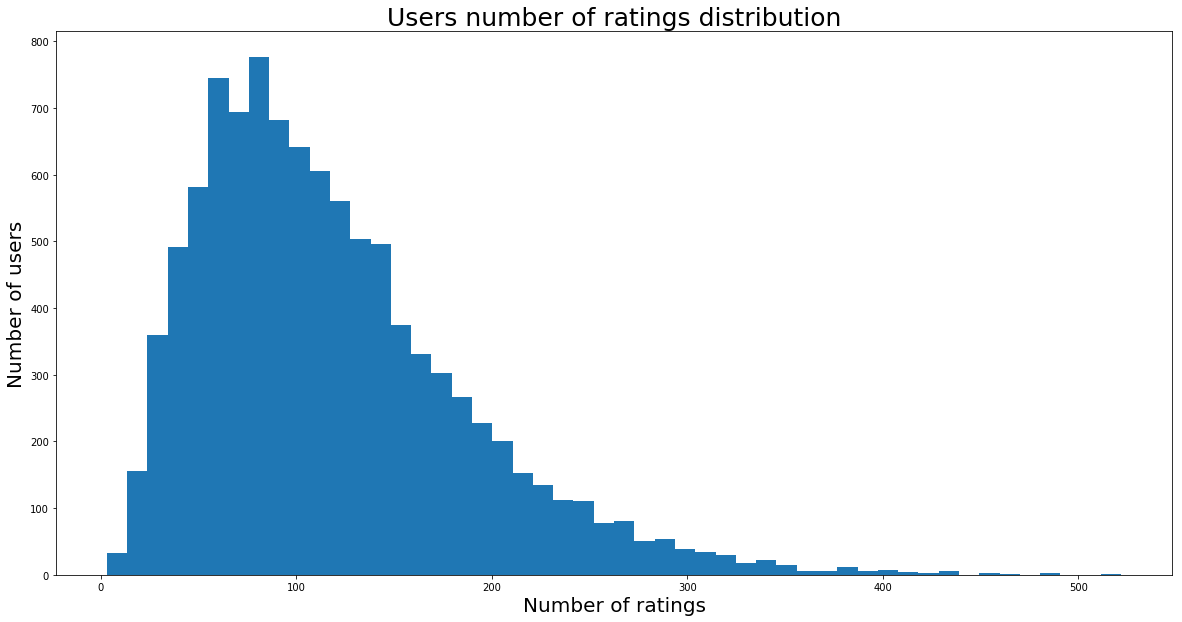

In [7]:
plt.figure(figsize = (20,10))
user_rating.hist(bins = 50, grid = False)
plt.xlabel('Number of ratings', fontsize = 20)
plt.ylabel('Number of users', fontsize = 20)
plt.title('Users number of ratings distribution', fontsize = 25)
plt.savefig('users.pdf')
plt.show()

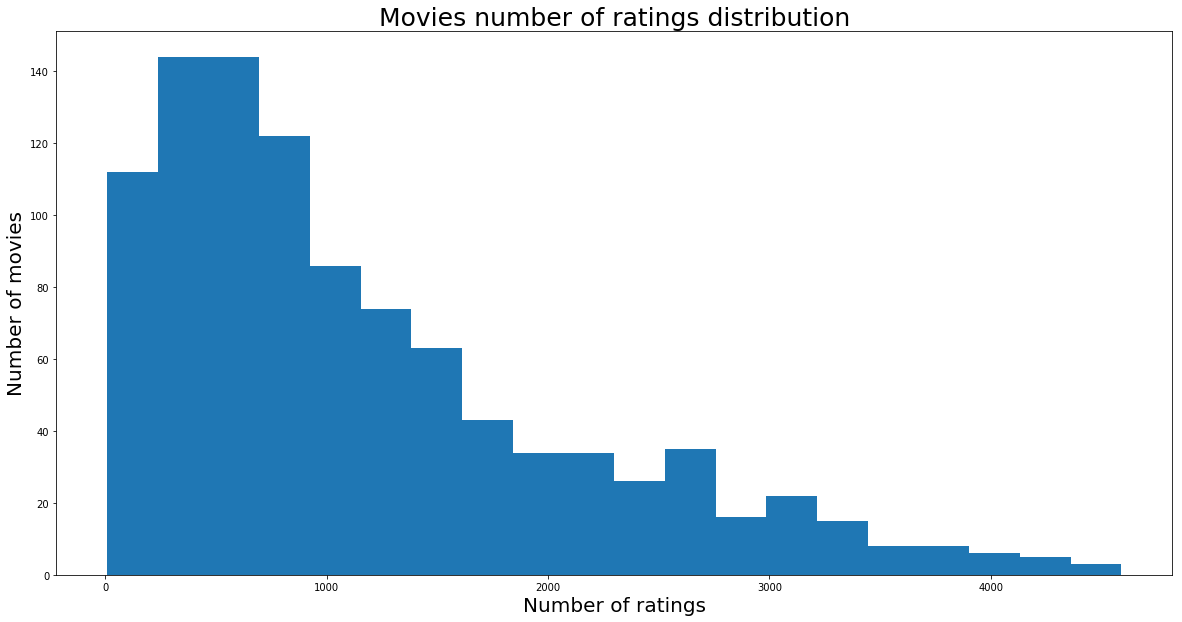

In [8]:
plt.figure(figsize = (20,10))
movie_rating.hist(bins = 20, grid = False)
plt.xlabel('Number of ratings', fontsize = 20)
plt.ylabel('Number of movies', fontsize = 20)
plt.title('Movies number of ratings distribution', fontsize = 25)
plt.savefig('movies.pdf')
plt.show()

# RMSE Graph

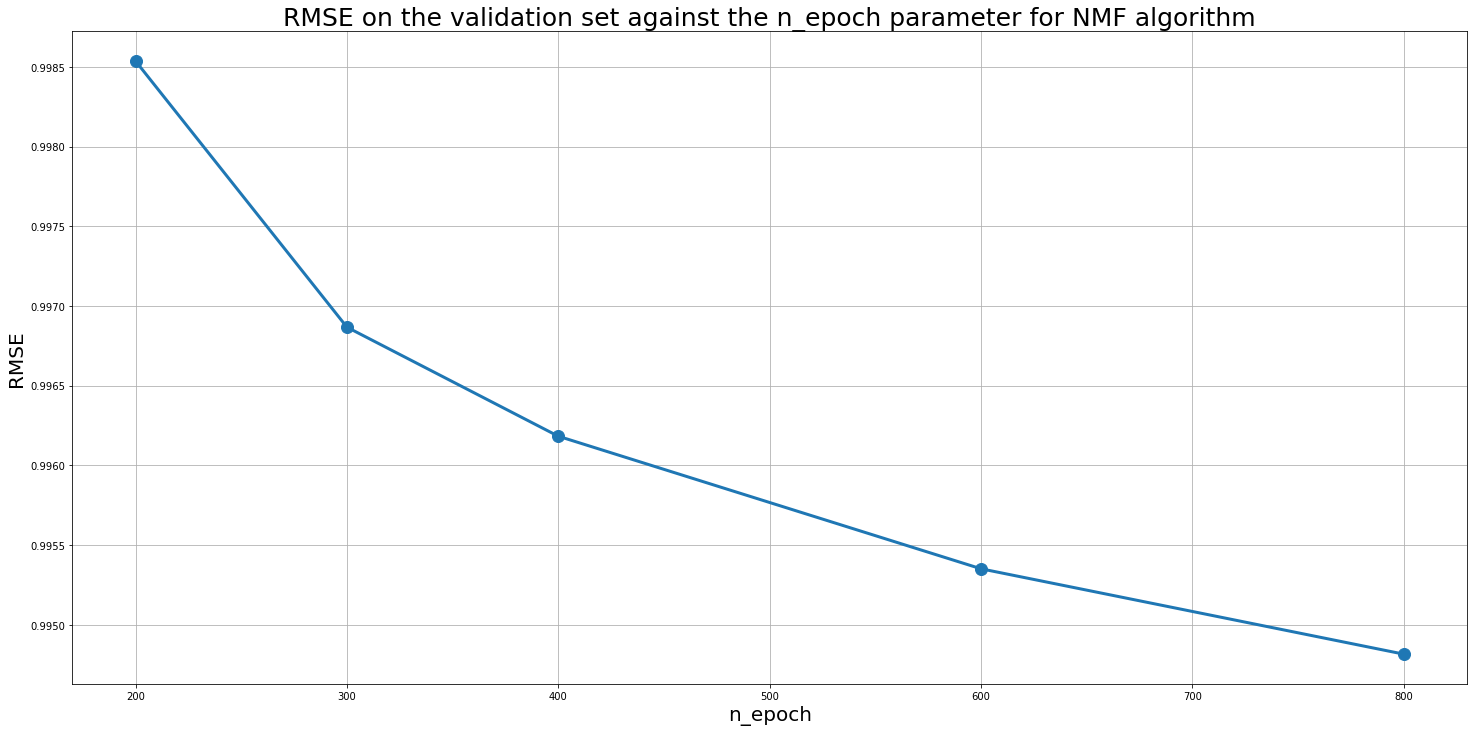

In [9]:
#NMF NMF(biased = True, n_epochs = N, random_state = 200)
N = [200,300,400,600,800]
res = [0.998535844319,0.996867127638,0.996183307499,0.995351962507,0.994816671813]
plt.figure(figsize = (25,12))
plt.plot(N,res,marker = 'o',linewidth = 3.0, markersize=12)
plt.xlabel('n_epoch', fontsize = 20)
plt.ylabel('RMSE',  fontsize = 20)
plt.title('RMSE on the validation set against the n_epoch parameter for NMF algorithm',  fontsize = 25)
plt.grid()
plt.savefig('nmf.pdf')
plt.show()

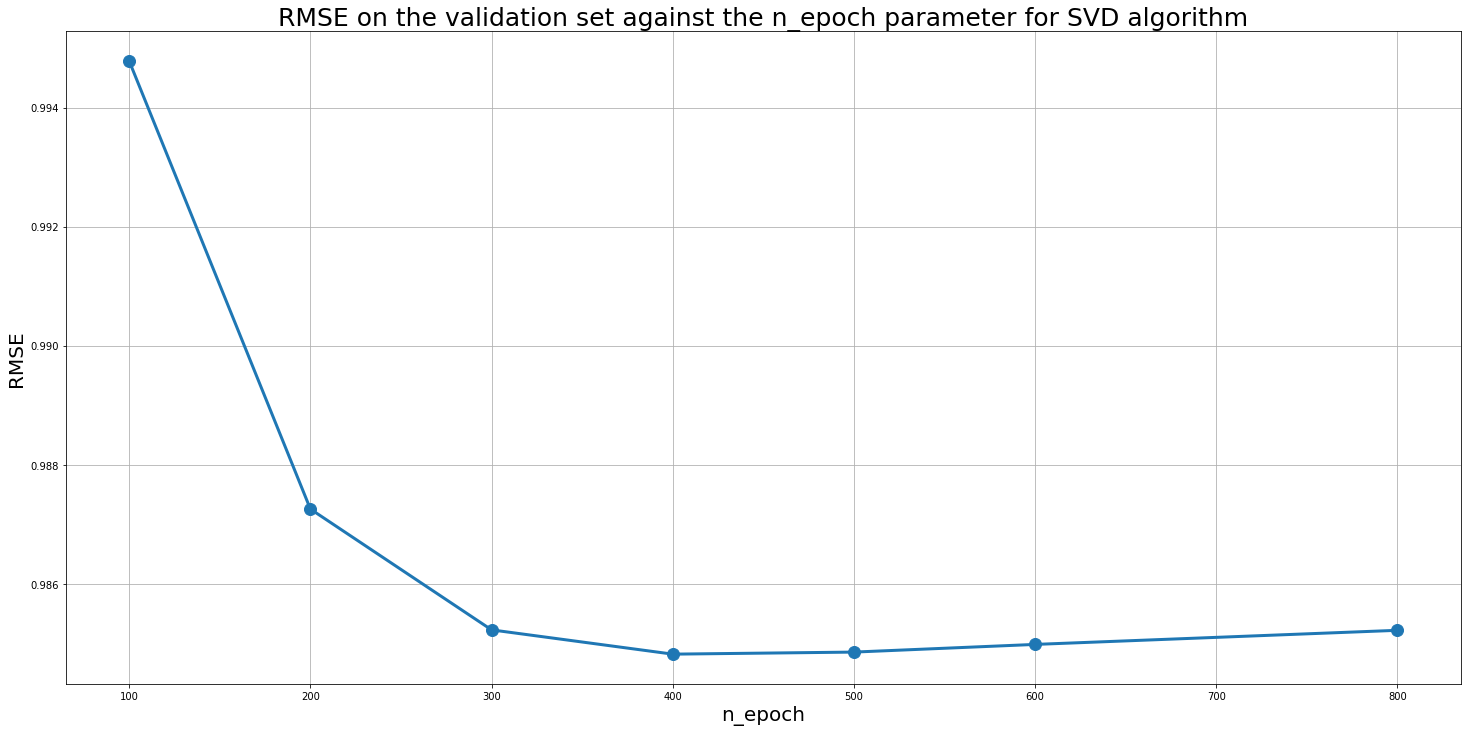

In [10]:
#SVDb SVD(n_factors = 400, lr_all = 0.0015, biased = True, reg_all = 0.1, n_epochs = N, random_state = 500)
N = [100,200,300,400,500,600,800]
ep = [0.99478016940885972,0.98725648540629196,0.985227466716,0.98481962070630613,0.98485419944715935,0.98498306835145,0.98522005361179965]
plt.figure(figsize = (25,12))
plt.plot(N,ep,marker = 'o',linewidth = 3.0, markersize = 12)
plt.xlabel('n_epoch',  fontsize = 20)
plt.ylabel('RMSE',  fontsize = 20)
plt.title('RMSE on the validation set against the n_epoch parameter for SVD algorithm',  fontsize = 25)
plt.grid()
plt.savefig('svd.pdf')
plt.show()